# SASE: Self-Amplified Spontaneous Emission

In [1]:
import sys
ROOT_DIR = ".."
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

In [2]:
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pysingfel as ps

Psana functionality is not available.


### LS49 specifications
https://pswww.slac.stanford.edu/questionnaire_slac/proposal_questionnaire/run16/LS49/#xray

Due to the random nature of the spectrum, we can't compare it to pysingfel SASE spectrum implementation shot-by-shot.
User can change the values to match with the LS49 SASE spectrum, so that our simulated SASE spectrum could give a good approximation of the real data.

Here, we provide a small subset of spectra: 3 plots at 7120eV and 3 plots at 3560eV, generated from nanoBragg.

### Test Case 1. Compare pysingfel SASE spectrum with LS49 SASE spectrum (photon energy = 7120eV)

In [3]:
wavlen_7120eV = np.array([1.75354289, 1.75329492, 1.75304701, 1.75279918, 1.75255142,
       1.75230372, 1.7520561 , 1.75180855, 1.75156107, 1.75131365,
       1.75106631, 1.75081904, 1.75057183, 1.7503247 , 1.75007763,
       1.74983064, 1.74958372, 1.74933686, 1.74909008, 1.74884336,
       1.74859671, 1.74835014, 1.74810363, 1.74785719, 1.74761083,
       1.74736453, 1.7471183 , 1.74687214, 1.74662605, 1.74638003,
       1.74613408, 1.74588819, 1.74564238, 1.74539664, 1.74515096,
       1.74490536, 1.74465982, 1.74441435, 1.74416895, 1.74392362,
       1.74367836, 1.74343317, 1.74318805, 1.742943  , 1.74269801,
       1.7424531 , 1.74220825, 1.74196347, 1.74171876, 1.74147412,
       1.74122955, 1.74098505, 1.74074061, 1.74049624, 1.74025195,
       1.74000772, 1.73976356, 1.73951947, 1.73927544, 1.73903149,
       1.7387876 , 1.73854378, 1.73830004, 1.73805635, 1.73781274,
       1.7375692 , 1.73732572, 1.73708231, 1.73683897, 1.7365957 ,
       1.7363525 , 1.73610936, 1.73586629, 1.73562329, 1.73538036,
       1.7351375 , 1.7348947 , 1.73465198, 1.73440932, 1.73416672,
       1.7339242 , 1.73368175, 1.73343936, 1.73319704, 1.73295478,
       1.7327126 , 1.73247048, 1.73222843, 1.73198645, 1.73174454,
       1.73150269, 1.73126091, 1.7310192 , 1.73077755, 1.73053598,
       1.73029447, 1.73005302, 1.72981165, 1.72957034, 1.7293291 ])


flux_7120eV_ebeam0 = np.array([1.23671883e+08, 9.61746443e+07, 1.24049034e+08, 1.42267618e+08,
       1.89821645e+08, 2.05998928e+08, 2.21572519e+08, 2.54688519e+08,
       2.84442325e+08, 2.96166287e+08, 3.64081476e+08, 4.17700295e+08,
       4.71363120e+08, 6.59135221e+08, 5.73812964e+08, 6.34300498e+08,
       7.71302387e+08, 8.86449012e+08, 9.81827870e+08, 8.39448332e+08,
       9.24321990e+08, 1.19273773e+09, 1.30524268e+09, 1.69064908e+09,
       2.12312386e+09, 1.80994361e+09, 1.79148373e+09, 1.66648726e+09,
       2.30305012e+09, 3.88071700e+09, 4.71397448e+09, 5.63242428e+09,
       5.93986877e+09, 5.94284736e+09, 6.19665682e+09, 8.19924840e+09,
       9.76019212e+09, 1.40454734e+10, 1.72493787e+10, 1.78756611e+10,
       2.06738251e+10, 3.70573675e+10, 5.48781626e+10, 5.39452192e+10,
       7.22689630e+10, 6.23604334e+10, 1.29966480e+11, 5.57813995e+10,
       4.26045603e+10, 4.26934346e+10, 4.47353436e+10, 4.25684554e+10,
       2.81984456e+10, 3.36572783e+10, 2.23099091e+10, 2.28223716e+10,
       3.40715634e+10, 3.37104670e+10, 2.60777388e+10, 1.81401929e+10,
       2.25881611e+10, 1.32293518e+10, 7.33472574e+09, 6.04655306e+09,
       7.01928695e+09, 6.57396092e+09, 5.76262230e+09, 4.77476422e+09,
       2.79639896e+09, 2.99550529e+09, 3.42484922e+09, 2.73264203e+09,
       2.61095436e+09, 1.84199222e+09, 1.83487864e+09, 1.86871949e+09,
       1.87949279e+09, 1.11523534e+09, 1.62063334e+09, 3.12318471e+09,
       4.08154144e+09, 1.92038270e+09, 1.50815084e+09, 1.59028591e+09,
       3.05379232e+09, 2.89750070e+09, 1.19314298e+09, 7.62200211e+08,
       7.61331248e+08, 7.33508824e+08, 8.14328606e+08, 7.79339607e+08,
       7.79098808e+08, 7.06789802e+08, 3.97094179e+08, 2.85029543e+08,
       2.47650860e+08, 1.75471189e+08, 1.15599259e+08, 1.09351249e+08])

flux_7120eV_ebeam1 = np.array([1.40345120e+08, 1.06215688e+08, 1.38050550e+08, 1.87469764e+08,
       2.56306785e+08, 2.58050100e+08, 3.05531303e+08, 3.62544250e+08,
       3.97736755e+08, 4.28373005e+08, 5.48991629e+08, 5.00576101e+08,
       5.15028093e+08, 7.35041558e+08, 7.37945868e+08, 9.30081048e+08,
       8.31471244e+08, 9.01760372e+08, 9.62507509e+08, 1.50461937e+09,
       1.86922696e+09, 1.70799736e+09, 1.41516825e+09, 1.99123415e+09,
       2.88544775e+09, 2.31885984e+09, 2.75855722e+09, 3.75650945e+09,
       3.97639885e+09, 3.69212525e+09, 6.80078246e+09, 6.64227334e+09,
       6.41862845e+09, 8.48537873e+09, 1.01411941e+10, 9.86815597e+09,
       1.87203212e+10, 2.20609831e+10, 2.57811956e+10, 3.36918408e+10,
       4.40790348e+10, 8.16874728e+10, 9.10989565e+10, 1.30938009e+11,
       8.60485532e+10, 7.83958923e+10, 7.37643170e+10, 7.25550933e+10,
       6.45864025e+10, 3.42628465e+10, 3.88946850e+10, 3.35476125e+10,
       2.80513756e+10, 2.34793688e+10, 2.02531564e+10, 3.15751740e+10,
       1.79535525e+10, 1.45745923e+10, 1.75380134e+10, 1.31971282e+10,
       8.06093005e+09, 6.23833864e+09, 8.37083748e+09, 8.15721849e+09,
       8.48822427e+09, 4.03088779e+09, 3.06966452e+09, 2.18366398e+09,
       1.78481450e+09, 2.09111051e+09, 2.06836883e+09, 1.85257098e+09,
       1.95268971e+09, 1.91882431e+09, 2.24362028e+09, 2.28906187e+09,
       1.70025361e+09, 1.09308593e+09, 1.29402966e+09, 9.41250486e+08,
       9.07106640e+08, 1.20813743e+09, 1.18764803e+09, 1.15118465e+09,
       1.20128725e+09, 1.30696036e+09, 6.89681374e+08, 7.17240158e+08,
       8.38638301e+08, 6.79147942e+08, 5.38343888e+08, 4.17824536e+08,
       5.94006359e+08, 6.26034324e+08, 4.41202466e+08, 3.49348705e+08,
       2.74986092e+08, 1.98769847e+08, 1.29017673e+08, 1.01569608e+08])

flux_7120eV_ebeam2 = np.array([1.11551190e+08, 8.60626120e+07, 1.16654414e+08, 1.38471995e+08,
       1.93325509e+08, 2.07644878e+08, 2.00834484e+08, 2.30099536e+08,
       2.69623309e+08, 3.23774873e+08, 3.38328042e+08, 3.40711435e+08,
       3.80571449e+08, 5.62078617e+08, 4.65815997e+08, 5.02007762e+08,
       6.11309710e+08, 5.46885440e+08, 5.87655661e+08, 7.28926961e+08,
       8.26818142e+08, 9.23129375e+08, 1.16096657e+09, 9.39461421e+08,
       1.42017087e+09, 1.86238008e+09, 2.51372797e+09, 2.67979514e+09,
       2.42129172e+09, 2.92948972e+09, 3.27488321e+09, 5.27575266e+09,
       5.72848197e+09, 6.47613381e+09, 9.79238642e+09, 7.35737655e+09,
       9.40153414e+09, 1.48635505e+10, 1.33794987e+10, 1.79662285e+10,
       3.22761284e+10, 4.69818334e+10, 4.65346869e+10, 3.87063537e+10,
       8.85008984e+10, 7.58403224e+10, 8.07924630e+10, 7.75730108e+10,
       1.19890949e+11, 6.18158996e+10, 3.84568443e+10, 3.42069313e+10,
       1.98258504e+10, 2.87290947e+10, 1.95967299e+10, 2.55761756e+10,
       3.65179922e+10, 2.06304723e+10, 1.52803656e+10, 9.74341792e+09,
       6.81953587e+09, 6.75715106e+09, 7.02922694e+09, 3.67061367e+09,
       3.67033966e+09, 4.73074261e+09, 8.69512726e+09, 5.98912105e+09,
       3.65385048e+09, 3.06892123e+09, 4.47626351e+09, 4.67100108e+09,
       3.12850715e+09, 2.05828224e+09, 3.22328501e+09, 1.76882524e+09,
       1.52431825e+09, 1.28592396e+09, 1.24578623e+09, 1.08279686e+09,
       1.38991922e+09, 1.91573633e+09, 1.08312249e+09, 2.03877231e+09,
       2.27023851e+09, 8.49827193e+08, 5.98502220e+08, 5.82039560e+08,
       4.51848289e+08, 5.30003022e+08, 4.66799735e+08, 3.71049454e+08,
       4.62967377e+08, 3.75321310e+08, 2.11289095e+08, 1.81361824e+08,
       1.64964979e+08, 1.43575007e+08, 1.08318553e+08, 8.46742350e+07])

In [4]:
# Below we provide some default values of bandwidth, spike_width, n_spike,
# user can change the values to match with the LS49 SASE spectrum
bandwidth = 5e-3
spike_width = 1e-4
n_spike = 15
beam = ps.SASEBeam(bandwidth, spike_width, n_spike, fname=ROOT_DIR+'/input/beam/amo86615.beam')
beam.photon_energy = 7120 # set the photon energy to 7120eV

In [5]:
sase = beam.generate_new_state()

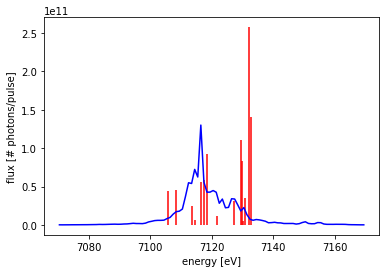

In [6]:
spikes = []
for i in range(n_spike):
    spikes.append((sase[i].wavelength, sase[i].get_photons_per_pulse()))
spikes = sorted(spikes , key=lambda k: [k[0], k[1]])
wavlen = [spike[0] for spike in spikes]
energy = [1.23984197386209e-06/spike[0] for spike in spikes]
flux = [spike[1] for spike in spikes]
plt.vlines(energy, 0, flux, color="r")
plt.plot(12398.425/wavlen_7120eV,flux_7120eV_ebeam0,"b")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.show()

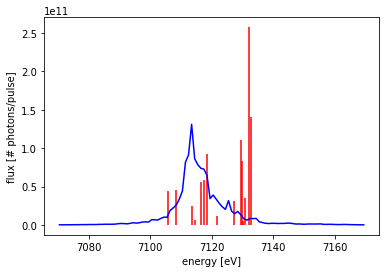

In [7]:
plt.vlines(energy, 0, flux, color="r")
plt.plot(12398.425/wavlen_7120eV,flux_7120eV_ebeam1,"b")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.show()

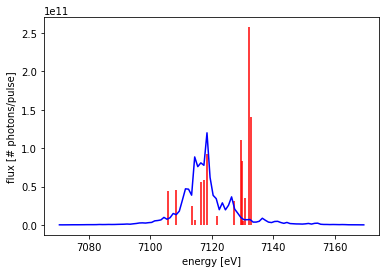

In [8]:
plt.vlines(energy, 0, flux, color="r")
plt.plot(12398.425/wavlen_7120eV,flux_7120eV_ebeam2,"b")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.show()

### Test Case 2. Compare pysingfel SASE spectrum with LS49 SASE spectrum (photon energy = 3560eV)

In [9]:
wavlen_3560eV = np.array([3.53181171, 3.53080592, 3.52980071, 3.52879607, 3.527792  ,
       3.52678851, 3.52578558, 3.52478323, 3.52378144, 3.52278022,
       3.52177958, 3.5207795 , 3.51977999, 3.51878104, 3.51778266,
       3.51678485, 3.51578761, 3.51479093, 3.51379481, 3.51279926,
       3.51180428, 3.51080985, 3.50981599, 3.5088227 , 3.50782996,
       3.50683779, 3.50584618, 3.50485512, 3.50386463, 3.5028747 ,
       3.50188533, 3.50089651, 3.49990826, 3.49892056, 3.49793342,
       3.49694683, 3.49596081, 3.49497533, 3.49399042, 3.49300606,
       3.49202225, 3.491039  , 3.4900563 , 3.48907415, 3.48809256,
       3.48711152, 3.48613103, 3.48515109, 3.4841717 , 3.48319286,
       3.48221458, 3.48123684, 3.48025965, 3.47928301, 3.47830692,
       3.47733137, 3.47635637, 3.47538192, 3.47440801, 3.47343465,
       3.47246184, 3.47148957, 3.47051784, 3.46954666, 3.46857602,
       3.46760593, 3.46663638, 3.46566737, 3.4646989 , 3.46373097,
       3.46276358, 3.46179673, 3.46083043, 3.45986466, 3.45889943,
       3.45793474, 3.45697058, 3.45600697, 3.45504389, 3.45408135,
       3.45311934, 3.45215787, 3.45119694, 3.45023654, 3.44927667,
       3.44831734, 3.44735854, 3.44640028, 3.44544255, 3.44448535,
       3.44352868, 3.44257254, 3.44161693, 3.44066186, 3.43970731,
       3.43875329, 3.43779981, 3.43684685, 3.43589442, 3.43494251])

flux_3560eV_ebeam0 = np.array([1.23671883e+08, 9.61746443e+07, 1.24049034e+08, 1.42267618e+08,
       1.89821645e+08, 2.05998928e+08, 2.21572519e+08, 2.54688519e+08,
       2.84442325e+08, 2.96166287e+08, 3.64081476e+08, 4.17700295e+08,
       4.71363120e+08, 6.59135221e+08, 5.73812964e+08, 6.34300498e+08,
       7.71302387e+08, 8.86449012e+08, 9.81827870e+08, 8.39448332e+08,
       9.24321990e+08, 1.19273773e+09, 1.30524268e+09, 1.69064908e+09,
       2.12312386e+09, 1.80994361e+09, 1.79148373e+09, 1.66648726e+09,
       2.30305012e+09, 3.88071700e+09, 4.71397448e+09, 5.63242428e+09,
       5.93986877e+09, 5.94284736e+09, 6.19665682e+09, 8.19924840e+09,
       9.76019212e+09, 1.40454734e+10, 1.72493787e+10, 1.78756611e+10,
       2.06738251e+10, 3.70573675e+10, 5.48781626e+10, 5.39452192e+10,
       7.22689630e+10, 6.23604334e+10, 1.29966480e+11, 5.57813995e+10,
       4.26045603e+10, 4.26934346e+10, 4.47353436e+10, 4.25684554e+10,
       2.81984456e+10, 3.36572783e+10, 2.23099091e+10, 2.28223716e+10,
       3.40715634e+10, 3.37104670e+10, 2.60777388e+10, 1.81401929e+10,
       2.25881611e+10, 1.32293518e+10, 7.33472574e+09, 6.04655306e+09,
       7.01928695e+09, 6.57396092e+09, 5.76262230e+09, 4.77476422e+09,
       2.79639896e+09, 2.99550529e+09, 3.42484922e+09, 2.73264203e+09,
       2.61095436e+09, 1.84199222e+09, 1.83487864e+09, 1.86871949e+09,
       1.87949279e+09, 1.11523534e+09, 1.62063334e+09, 3.12318471e+09,
       4.08154144e+09, 1.92038270e+09, 1.50815084e+09, 1.59028591e+09,
       3.05379232e+09, 2.89750070e+09, 1.19314298e+09, 7.62200211e+08,
       7.61331248e+08, 7.33508824e+08, 8.14328606e+08, 7.79339607e+08,
       7.79098808e+08, 7.06789802e+08, 3.97094179e+08, 2.85029543e+08,
       2.47650860e+08, 1.75471189e+08, 1.15599259e+08, 1.09351249e+08])

flux_3560eV_ebeam1 = np.array([1.40345120e+08, 1.06215688e+08, 1.38050550e+08, 1.87469764e+08,
       2.56306785e+08, 2.58050100e+08, 3.05531303e+08, 3.62544250e+08,
       3.97736755e+08, 4.28373005e+08, 5.48991629e+08, 5.00576101e+08,
       5.15028093e+08, 7.35041558e+08, 7.37945868e+08, 9.30081048e+08,
       8.31471244e+08, 9.01760372e+08, 9.62507509e+08, 1.50461937e+09,
       1.86922696e+09, 1.70799736e+09, 1.41516825e+09, 1.99123415e+09,
       2.88544775e+09, 2.31885984e+09, 2.75855722e+09, 3.75650945e+09,
       3.97639885e+09, 3.69212525e+09, 6.80078246e+09, 6.64227334e+09,
       6.41862845e+09, 8.48537873e+09, 1.01411941e+10, 9.86815597e+09,
       1.87203212e+10, 2.20609831e+10, 2.57811956e+10, 3.36918408e+10,
       4.40790348e+10, 8.16874728e+10, 9.10989565e+10, 1.30938009e+11,
       8.60485532e+10, 7.83958923e+10, 7.37643170e+10, 7.25550933e+10,
       6.45864025e+10, 3.42628465e+10, 3.88946850e+10, 3.35476125e+10,
       2.80513756e+10, 2.34793688e+10, 2.02531564e+10, 3.15751740e+10,
       1.79535525e+10, 1.45745923e+10, 1.75380134e+10, 1.31971282e+10,
       8.06093005e+09, 6.23833864e+09, 8.37083748e+09, 8.15721849e+09,
       8.48822427e+09, 4.03088779e+09, 3.06966452e+09, 2.18366398e+09,
       1.78481450e+09, 2.09111051e+09, 2.06836883e+09, 1.85257098e+09,
       1.95268971e+09, 1.91882431e+09, 2.24362028e+09, 2.28906187e+09,
       1.70025361e+09, 1.09308593e+09, 1.29402966e+09, 9.41250486e+08,
       9.07106640e+08, 1.20813743e+09, 1.18764803e+09, 1.15118465e+09,
       1.20128725e+09, 1.30696036e+09, 6.89681374e+08, 7.17240158e+08,
       8.38638301e+08, 6.79147942e+08, 5.38343888e+08, 4.17824536e+08,
       5.94006359e+08, 6.26034324e+08, 4.41202466e+08, 3.49348705e+08,
       2.74986092e+08, 1.98769847e+08, 1.29017673e+08, 1.01569608e+08])

flux_3560eV_ebeam2 = np.array([1.11551190e+08, 8.60626120e+07, 1.16654414e+08, 1.38471995e+08,
       1.93325509e+08, 2.07644878e+08, 2.00834484e+08, 2.30099536e+08,
       2.69623309e+08, 3.23774873e+08, 3.38328042e+08, 3.40711435e+08,
       3.80571449e+08, 5.62078617e+08, 4.65815997e+08, 5.02007762e+08,
       6.11309710e+08, 5.46885440e+08, 5.87655661e+08, 7.28926961e+08,
       8.26818142e+08, 9.23129375e+08, 1.16096657e+09, 9.39461421e+08,
       1.42017087e+09, 1.86238008e+09, 2.51372797e+09, 2.67979514e+09,
       2.42129172e+09, 2.92948972e+09, 3.27488321e+09, 5.27575266e+09,
       5.72848197e+09, 6.47613381e+09, 9.79238642e+09, 7.35737655e+09,
       9.40153414e+09, 1.48635505e+10, 1.33794987e+10, 1.79662285e+10,
       3.22761284e+10, 4.69818334e+10, 4.65346869e+10, 3.87063537e+10,
       8.85008984e+10, 7.58403224e+10, 8.07924630e+10, 7.75730108e+10,
       1.19890949e+11, 6.18158996e+10, 3.84568443e+10, 3.42069313e+10,
       1.98258504e+10, 2.87290947e+10, 1.95967299e+10, 2.55761756e+10,
       3.65179922e+10, 2.06304723e+10, 1.52803656e+10, 9.74341792e+09,
       6.81953587e+09, 6.75715106e+09, 7.02922694e+09, 3.67061367e+09,
       3.67033966e+09, 4.73074261e+09, 8.69512726e+09, 5.98912105e+09,
       3.65385048e+09, 3.06892123e+09, 4.47626351e+09, 4.67100108e+09,
       3.12850715e+09, 2.05828224e+09, 3.22328501e+09, 1.76882524e+09,
       1.52431825e+09, 1.28592396e+09, 1.24578623e+09, 1.08279686e+09,
       1.38991922e+09, 1.91573633e+09, 1.08312249e+09, 2.03877231e+09,
       2.27023851e+09, 8.49827193e+08, 5.98502220e+08, 5.82039560e+08,
       4.51848289e+08, 5.30003022e+08, 4.66799735e+08, 3.71049454e+08,
       4.62967377e+08, 3.75321310e+08, 2.11289095e+08, 1.81361824e+08,
       1.64964979e+08, 1.43575007e+08, 1.08318553e+08, 8.46742350e+07])

In [10]:
# user can change the value of bandwidth, spike_width, n_spike to match with the LS49 SASE spectrum
bandwidth = 1e-2
spike_width = 1e-4
n_spike = 15
beam = ps.SASEBeam(bandwidth, spike_width, n_spike, fname=ROOT_DIR+'/input/beam/amo86615.beam')
beam.photon_energy = 3560 # set the photon energy to 3560eV

In [11]:
sase = beam.generate_new_state()

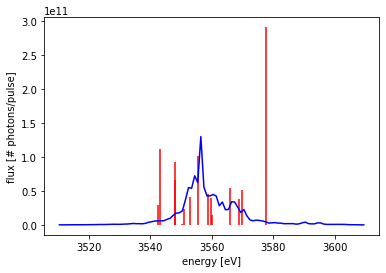

In [12]:
spikes = []
for i in range(n_spike):
    spikes.append((sase[i].wavelength, sase[i].get_photons_per_pulse()))
spikes = sorted(spikes , key=lambda k: [k[0], k[1]])
wavlen = [spike[0] for spike in spikes]
energy = [1.23984197386209e-06/spike[0] for spike in spikes]
flux = [spike[1] for spike in spikes]
plt.vlines(energy, 0, flux, color="r")
plt.plot(12398.425/wavlen_3560eV,flux_3560eV_ebeam0,"b")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.show()

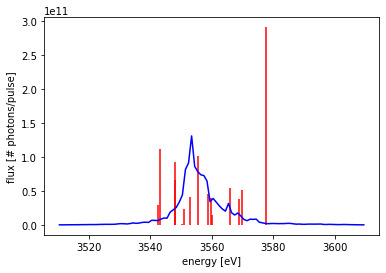

In [13]:
plt.vlines(energy, 0, flux, color="r") 
plt.plot(12398.425/wavlen_3560eV,flux_3560eV_ebeam1,"b")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.show()

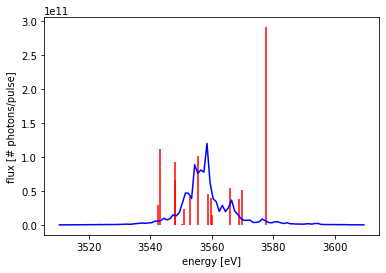

In [14]:
plt.vlines(energy, 0, flux, color="r") 
plt.plot(12398.425/wavlen_3560eV,flux_3560eV_ebeam2,"b")
plt.xlabel('energy [eV]')
plt.ylabel('flux [# photons/pulse]')
plt.show()

### Metric for comparison between pysingfel SASE spectra (simulated) and LS49 SASE spectra (real)

### t-test
The t-test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t-test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

We make a comparison between (1) N=n_spike samples in the central region of the LS49 SASE spectra between (2) the simulated SASE spectra using pysingfel. The reason behind is that the real spectra is heavily weighted in the central region, hence, the contribution from the rest spikes can be safely ignored.

In [17]:
# find the spike with the maxiumum flux value and use it as the central spike
max_index = flux_3560eV_ebeam0.tolist().index(max(flux_3560eV_ebeam0))

In [18]:
flux_3560eV_ebeam0[max_index]

129966480000.0

In [19]:
N = n_spike # sample size
central_flux_3560eV_ebeam0 = flux_3560eV_ebeam0[max_index-int(np.floor(N/2)):max_index+int(np.ceil(N/2))]
central_flux_3560eV_ebeam0

In [21]:
central_wavlen_3560eV = wavlen_3560eV[max_index-int(np.floor(N/2)):max_index+int(np.ceil(N/2))]
central_wavlen_3560eV

In [22]:
central_energy_3560eV = 12398.425/central_wavlen_3560eV
central_energy_3560eV

In [28]:
a = central_energy_3560eV
b = np.array(energy)

t, p = stats.ttest_ind(a,b)
print("t-score = " + str(t))
print("p-value = " + str(p))


if p < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t-score = -0.12527331932944138
p-value = 0.9012023041271214
accept null hypothesis


In [27]:
a = central_flux_3560eV_ebeam0
b = np.array(flux)

t, p = stats.ttest_ind(a,b)
print("t-score = " + str(t))
print("p-value = " + str(p))

if p < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t-score = -0.9049464037740361
p-value = 0.3732149240386764
accept null hypothesis


### Conclusion
A p-value > 0.05 is obtained, thus we accept the null hypothesis, which means that the mean of the two distributions are statistically insignificant.